<a href="https://colab.research.google.com/github/v2047/GRIP-Internship/blob/main/Task_1_Prediction_using_Supervised_ML_(Simple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To Predict the percentage of an student based on no of study using simple Linear Regression.**


**Simple Linear Regression:**
It is used to analyze the relationship between two variables means independent variables and dependent variable.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split


In [3]:
from re import S
# Reading the data from URL
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print(student_data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
student_data.shape

(25, 2)

In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Top 5 value
student_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Validating the missing value
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
# Checking the duplicates data
student_data[student_data.duplicated()]

,Hours,Scores


Text(0.5, 1.0, 'Study Hours Vs Study Scores')

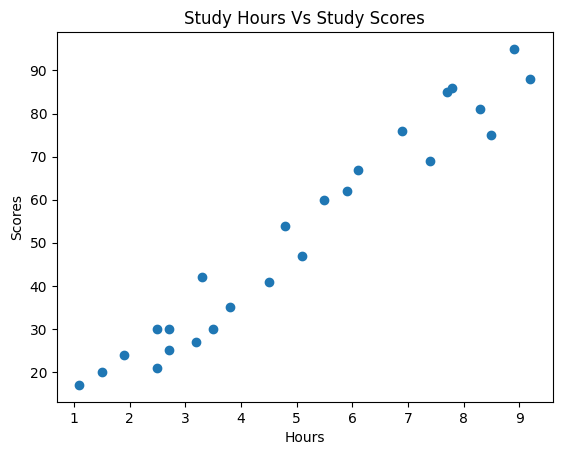

In [14]:
plt.scatter(x=student_data.Hours, y=student_data.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours Vs Study Scores')


**As per the scatter plot we observe there is linear relationship between Hours and Scores.**



**Preparing the data**

To divide the data into "independent variable(X)" (inputs) and "Dependent Variable(Y)" (outputs).

In [20]:
X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values



[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Now we have to split the into training and testing sets**

In [21]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

**Implementing the Linear Regression and Training the Model**


In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)   #Training the model
print("Training Complete")


Training Complete


In [62]:
y_pred = model.predict(X_test)

**Visualizing the results**

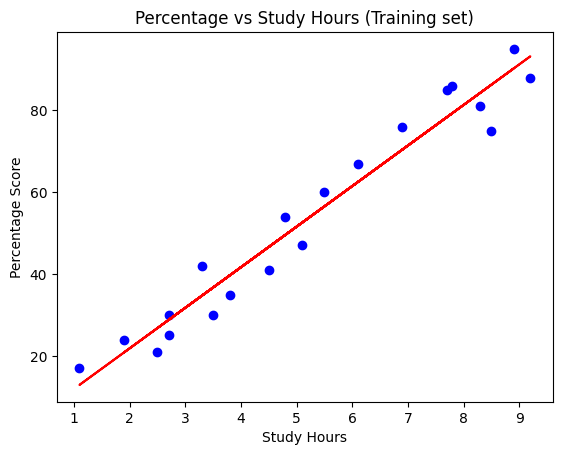

In [57]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Percentage vs Study Hours (Training set)')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

**Predictaions**

In [71]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [86]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [73]:
hours = 9.25  # Example: predict for 9.25 hours of study
predicted_score = model.predict([[hours]])
print(f'Predicted percentage score for {hours} hours of study: {predicted_score[0]}')

Predicted percentage score for 9.25 hours of study: 93.69173248737539


**Evaluations of Model**

The final step is to evaluate the performance of algorithm.
This step is particularly important to compare how well different algorithms perform on a particular dataset. There are many such metrics to evalute the performance of a model.

**R-squared (R2)**: This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, with 1 indicating a perfect fit.

In [76]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9454906892105354


**Mean Absolute Error (MAE)**: It measures the average magnitude of the errors in a set of predictions, without considering their direction.

In [77]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 4.183859899002982


In [78]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 21.598769307217456


In [80]:


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 4.647447612100373


Conculsion:**R squared value is closer to 1 which indicates it's good fit Model**

**Summary of the model:Students who study more hours will achieve higher marks compared to those who study less hours.**